In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("/content/Train_Data.csv")
data.head()

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers,average_review_rating
0,7f890f73298badd692c39c3801ef1d28,Batman - Role Play - Cowl and Batarang,Mattel,£14.99,NaN,4,1.0,Figures & Playsets > Science Fiction & Fantasy,http://www.amazon.co.uk/Rubies-Costume-Co-Flas...,"When kids aspire to be like Batman, it's easy ...",Technical Details Item Weight113 g Product Dim...,"When kids aspire to be like Batman, it's easy ...",http://www.amazon.co.uk/Rubies-Costume-Co-Flas...,NaN,Item was broken // 3.0 // 2 April 2014 // By\n...,"{""seller""=>{""Seller_name_1""=>""a1 Toys"", ""Selle...",4.5
1,83e55a2edb6c13dfc1c46d1577321b2e,Doctor Who 12-inch 50th Anniversary Collector ...,Dr Who,NaN,3 new,73,NaN,Figures & Playsets > Science Fiction & Fantasy,http://www.amazon.co.uk/Doctor-Who-Classic-Dal...,Product Description This ultimate Doctor Who c...,Technical Details Item Weight1.4 Kg Product Di...,Product Description This ultimate Doctor Who c...,http://www.amazon.co.uk/Dr-Who-Dalek-Projectio...,NaN,A wonderful collectors piece // 5.0 // 31 Aug....,NaN,4.6
2,4bfaaf6558582a0f337ad59fcd51fcf7,Melissa & Doug Sticker Collection - Pink,Melissa & Doug,£4.76,15 new,47,1.0,Arts & Crafts > Paper & Stickers,http://www.amazon.co.uk/Melissa-Doug-Sticker-C...,"Product Description Cute couture, adorable ani...",Technical Details Item Weight299 g Product Dim...,"Product Description Cute couture, adorable ani...",http://www.amazon.co.uk/Melissa-Doug-Habitats-...,NaN,Great sticker collection // 5.0 // 19 Jun. 201...,NaN,4.7
3,4e6702cb7fe9278f16dedc39a8808c72,"Rock and Roll Cards, 30 Team",ClubKing Ltd,£4.49,2 new,2,1.0,Hobbies > Trading Cards & Accessories > Packs ...,http://www.amazon.co.uk/ClubKing-Ltd-Football-...,"1 Pack of 25 Football Cards, 30 rockstars on e...",Technical Details Item Weight100 g Product Dim...,"1 Pack of 25 Football Cards, 30 rockstars on e...",http://www.amazon.co.uk/ClubKing-Ltd-Football-...,how many cards in a pack it dosn't say..?? // ...,Rock and roll cards // 5.0 // 28 July 2013 // ...,"{""seller""=>[{""Seller_name_1""=>""ClubKing Ltd"", ...",5.0
4,f505611d18b0ae98258896ae1b0f14c8,Crayola 16 Pipsqueak Glitter Glues,Crayola,£5.99,9 new,10,1.0,Characters & Brands > Crayola,http://www.amazon.co.uk/Crayola-3-3542-9-Glitt...,Product Description 16 Pipsqueak washable glit...,Technical Details Item Weight186 g Product Dim...,Product Description 16 Pipsqueak washable glit...,http://www.amazon.co.uk/Crayola-3-3542-9-Glitt...,NaN,Little fingers big imagination // 5.0 // 4 Mar...,"{""seller""=>[{""Seller_name_1""=>""BIC WAREHOUSE"",...",4.2


In [3]:
data.dtypes

uniq_id                                         object
product_name                                    object
manufacturer                                    object
price                                           object
number_available_in_stock                       object
number_of_reviews                               object
number_of_answered_questions                   float64
amazon_category_and_sub_category                object
customers_who_bought_this_item_also_bought      object
description                                     object
product_information                             object
product_description                             object
items_customers_buy_after_viewing_this_item     object
customer_questions_and_answers                  object
customer_reviews                                object
sellers                                         object
average_review_rating                          float64
dtype: object

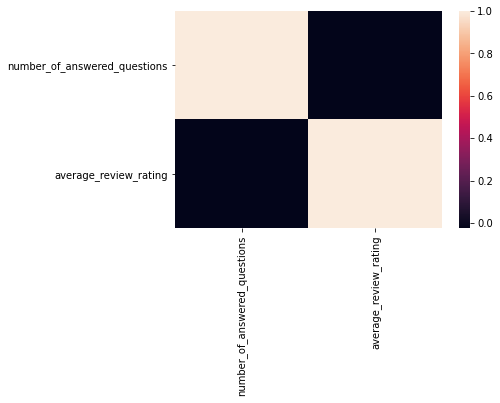

In [4]:
import seaborn as sns
sns.heatmap(data.corr())

In [5]:
#drop columns which are not required to predict average_review_ratings
data=data.drop(["uniq_id","product_name","manufacturer",'number_available_in_stock',
       'number_of_answered_questions', 'amazon_category_and_sub_category',
       'customers_who_bought_this_item_also_bought', 'description',
       'product_information', 'product_description',
       'items_customers_buy_after_viewing_this_item',
       'customer_questions_and_answers',"sellers","price","number_of_reviews"],axis=1)

In [6]:
data.tail()

,customer_reviews,average_review_rating
7481,Oxford 1/76 Devon & Somerset F and R Man Pump ...,4.0
7482,"High quality product, Exceeded expectations //...",5.0
7483,The kids love it // 5.0 // 23 Feb. 2014 // By\...,4.8
7484,"fun, educational // 4.0 // 14 Jan. 2013 // By\...",4.0
7485,Well well.. // 5.0 // 6 July 2015 // By\n \...,5.0


In [7]:
data.isnull().sum()

customer_reviews         3
average_review_rating    0
dtype: int64

In [8]:
data.dropna(subset=["customer_reviews"],inplace=True)

In [9]:
data.isnull().sum()

customer_reviews         0
average_review_rating    0
dtype: int64

In [10]:
#separating independent and dependent variables
x=data.drop("average_review_rating",axis=1)
y=data["average_review_rating"]

In [11]:
import nltk
import re
from nltk.corpus import stopwords

In [12]:
x["customer_reviews"][1]

'A wonderful collectors piece // 5.0 // 31 Aug. 2013 // By\n    \n    SteveINtheUKok\n  \nTOP 1000 REVIEWER on 31 Aug. 2013 // This is more a collectors item, than a toy.It arrives in a fairly standard Doctor Who box, albeit quite large.Its packed very well indeed you\'ll need a small screwdriver and some patience to remove it from its protective box. I prefer this way than rattling around getting broken.You\'ll also need to feed it 4xAA batteries as they are not included.There is a little assembly required, putting the eye stalk on wasn\'t the easiest task, don\'t force it! Once you realise its keyed, think of the keystone of a bridge or window and turn it sideways, it has a long edge on the right, a shorter edge on the left and then draw two lines top and bottom at an angle so they meet up, once you notice that putting the stalk on is much easier, if it fails to light, like mine did, gently push in the springy contacts under the stalk a few times to loosen them after transit and it s

In [13]:
x.head()

,customer_reviews
0,Item was broken // 3.0 // 2 April 2014 // By\n...
1,A wonderful collectors piece // 5.0 // 31 Aug....
2,Great sticker collection // 5.0 // 19 Jun. 201...
3,Rock and roll cards // 5.0 // 28 July 2013 // ...
4,Little fingers big imagination // 5.0 // 4 Mar...


In [14]:
customer_reviews=x["customer_reviews"].copy()
len(customer_reviews)

7483

In [15]:
customer_reviews[3]

'Rock and roll cards // 5.0 // 28 July 2013 // By\n    \n    Tricia M\n  \n on 28 July 2013 // this were awesome fundraising with a kick sold quick for clic sargent as everyone was interested in music rather than just a football card | cards // 5.0 // 10 Mar. 2013 // By\n    \n    Betti\n  \n on 10 Mar. 2013 // chosen to raise funds for charity and found them to be popular with the group as a change from football cards'

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
## implement BAG OF WORDS
countvector=CountVectorizer(ngram_range=(2,2))
X=countvector.fit_transform(customer_reviews)

In [18]:
X

<7483x305100 sparse matrix of type '<class 'numpy.int64'>'
	with 967454 stored elements in Compressed Sparse Row format>

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [23]:
pipelines = []
pipelines.append(('LinearRegression', Pipeline([('LR',LinearRegression())])))
pipelines.append(('LassoRegression', Pipeline([('LASSO', Lasso())])))
pipelines.append(('Elasticnet', Pipeline([('EN', ElasticNet())])))
pipelines.append(('KNN', Pipeline([('KNN', KNeighborsRegressor())])))
pipelines.append(('DecisionTree', Pipeline([('DTR', DecisionTreeRegressor())])))
pipelines.append(('GradientBoosting', Pipeline([('GB', GradientBoostingRegressor())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=5)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LinearRegression: -0.160653 (0.006338)
LassoRegression: -0.137760 (0.006041)
Elasticnet: -0.137760 (0.006041)
KNN: -0.181420 (0.007559)
DecisionTree: -0.155084 (0.007275)
GradientBoosting: -0.092364 (0.004243)


From the output above, it looks like the Gradient Boosting Regressor performs the best on the data. From this point onward, I will build the regression algorithm using the Gradient Boosting Regressor. The GBM will be tested with a few n_estimators using the GridSearchCV function.
But its takes longer time and my system is not able to take this task so go for linear regression model.

In [24]:
#from sklearn.model_selection import GridSearchCV

#param_grid = dict(n_estimators=np.array([50,100,200]))
#model = GradientBoostingRegressor()
#kfold = KFold(n_splits=5)
#grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfold)
#grid_result = grid.fit(X_train, y_train)

#means = grid_result.cv_results_['mean_test_score']
#stds = grid_result.cv_results_['std_test_score']
#params = grid_result.cv_results_['params']
#for mean, stdev, param in zip(means, stds, params):
    #print("%f (%f) with: %r" % (mean, stdev, param))

#print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

In [25]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
prediction=lr.predict(X_test)
from sklearn.metrics import mean_squared_error

In [28]:
rmse=np.sqrt(mean_squared_error(y_test,prediction))
print("rmse:-",rmse)

rmse:- 0.41322188570015617


In [29]:
test_data=pd.read_csv("/content/Test_Data.csv")
test_data.head()

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
0,90093bd02c6d5ce6d6c8f2e2af411fc1,Dolls House Miniature Cats x2,Heidi Ott,£12.00,NaN,1,1.0,Dolls & Accessories > Dolls' House Dolls & Acc...,NaN,A pair of dolls house miniature cats. This 1/1...,Technical Details Item Weight5 g Product Dimen...,A pair of dolls house miniature cats. This 1/1...,NaN,NaN,Dolls house miniatures // 5.0 // 9 Jan. 2013 /...,"{""seller""=>{""Seller_name_1""=>""1 12 Dollshouses..."
1,8dec13104fd4d1ad3ad5d9ff2af9ca0b,Disney Princess T7561 Tangled Rapunzel's Gondo...,Disney Princess,NaN,5 new,15,4.0,Characters & Brands > Disney > Toys,http://www.amazon.co.uk/Disney-Princess-Y0942-...,Product Description Relive the romantic moment...,Technical Details Item Weight907 g Product Dim...,Product Description Relive the romantic moment...,http://www.amazon.co.uk/Disney-Princess-Y0942-...,NaN,Tangled // 4.0 // 16 May 2011 // By\n \n ...,"{""seller""=>[{""Seller_name_1""=>""Anita Mall"", ""S..."
2,0fcde78856668c1563f54650b17620e7,My Pirate Party Music CD,Unknown,£4.99,1 used,6,1.0,Figures & Playsets > Pirates,http://www.amazon.co.uk/Pirate-Pencils-Childre...,Set the atmosphere for your Pirate themed part...,Technical Details Manufacturer recommended age...,Set the atmosphere for your Pirate themed part...,http://www.amazon.co.uk/Jake-And-The-Neverland...,NaN,Okay but that's all // 1.0 // 11 July 2011 // ...,"{""seller""=>{""Seller_name_1""=>""BuzzBase"", ""Sell..."
3,69a9becbd60381a4eb7cdafe30761ee4,1ST BIRTHDAY BANNER GIRL (BGC HOLOGRAPHIC) 9FT...,Every-occasion-party-supplies,£1.49,5 new,22,1.0,"Party Supplies > Banners, Stickers & Confetti ...",http://www.amazon.co.uk/1ST-BIRTHDAY-GIRL-PINK...,12ft long,Technical Details Manufacturer recommended age...,12ft long,http://www.amazon.co.uk/12ft-Foil-Ladybird-Bir...,NaN,Good quality but take down carefully as the fo...,NaN
4,18bc8b988f43f352b946a253642e1c6e,Beavis and Butt-Head Great Cornholio Bobble Head,Beavis And Butt-Head,£84.43,NaN,1,1.0,Hobbies > Collectible Figures & Memorabilia > ...,NaN,From the Beavis and Butt-Head TV series comes ...,Technical Details Item Weight159 g Product Dim...,From the Beavis and Butt-Head TV series comes ...,NaN,NaN,hilarious // 5.0 // 11 Dec. 2013 // By\n \n...,"{""seller""=>{""Seller_name_1""=>""M and N Media US..."


In [30]:
test_data=test_data.drop(['uniq_id', 'product_name', 'manufacturer', 'price',
       'number_available_in_stock', 'number_of_reviews',
       'number_of_answered_questions', 'amazon_category_and_sub_category',
       'customers_who_bought_this_item_also_bought', 'description',
       'product_information', 'product_description',
       'items_customers_buy_after_viewing_this_item',
       'customer_questions_and_answers', 'sellers'],axis=1)

In [31]:
test_data.isna().sum()

customer_reviews    0
dtype: int64

In [32]:
# Removing punctuations
test_data.replace("[^a-zA-Z]"," ",regex=True, inplace=True)

In [34]:
# Convertng  to lower case
for j in range(0,len(test_data)):
    test_data["customer_reviews"]=test_data["customer_reviews"].str.lower()
test_data["customer_reviews"][4]

'hilarious              dec          by          lauramcv     on    dec          bought as a bit of a gag gift  it s hilarious   bought in march and still going strong in december  although it can sometimes be alittle too sensitive '

In [35]:
test_customer_review=test_data["customer_reviews"].copy()
len(test_customer_review)

2496

In [36]:
test_data=countvector.transform(test_customer_review)

In [37]:
pred=lr.predict(test_data)

In [38]:
prediction=np.round(pred,1)
prediction

array([4.9, 3.8, 4.5, ..., 5. , 4.8, 4.9])

In [39]:
test_rating=pd.Series(prediction,name="prediction")
test_rating

0       4.9
1       3.8
2       4.5
3       4.7
4       4.8
       ... 
2491    4.9
2492    4.8
2493    5.0
2494    4.8
2495    4.9
Name: prediction, Length: 2496, dtype: float64

In [40]:
test_rating.to_csv("/content/submission.csv")